In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/petfinder-pawpularity-score/sample_submission.csv
/kaggle/input/petfinder-pawpularity-score/train.csv
/kaggle/input/petfinder-pawpularity-score/test.csv
/kaggle/input/petfinder-pawpularity-score/test/c978013571258ed6d4637f6e8cc9d6a3.jpg
/kaggle/input/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg
/kaggle/input/petfinder-pawpularity-score/test/43a2262d7738e3d420d453815151079e.jpg
/kaggle/input/petfinder-pawpularity-score/test/8f49844c382931444e68dffbe20228f4.jpg
/kaggle/input/petfinder-pawpularity-score/test/4128bae22183829d2b5fea10effdb0c3.jpg
/kaggle/input/petfinder-pawpularity-score/test/80bc3ccafcc51b66303c2c263aa38486.jpg
/kaggle/input/petfinder-pawpularity-score/test/e0de453c1bffc20c22b072b34b54e50f.jpg
/kaggle/input/petfinder-pawpularity-score/test/b03f7041962238a7c9d6537e22f9b017.jpg
/kaggle/input/petfinder-pawpularity-score/train/7954ebb5c90d9618e34959df0ad5f062.jpg
/kaggle/input/petfinder-pawpularity-score/train/2969162fab1d0e5a65e4ce02db26

In [2]:
import pandas as pd

meta_data_train = pd.read_csv("/kaggle/input/petfinder-pawpularity-score/train.csv", sep = ',')
meta_data_test = pd.read_csv("/kaggle/input/petfinder-pawpularity-score/test.csv",sep=',')

In [3]:
meta_data_train.shape

(9912, 14)

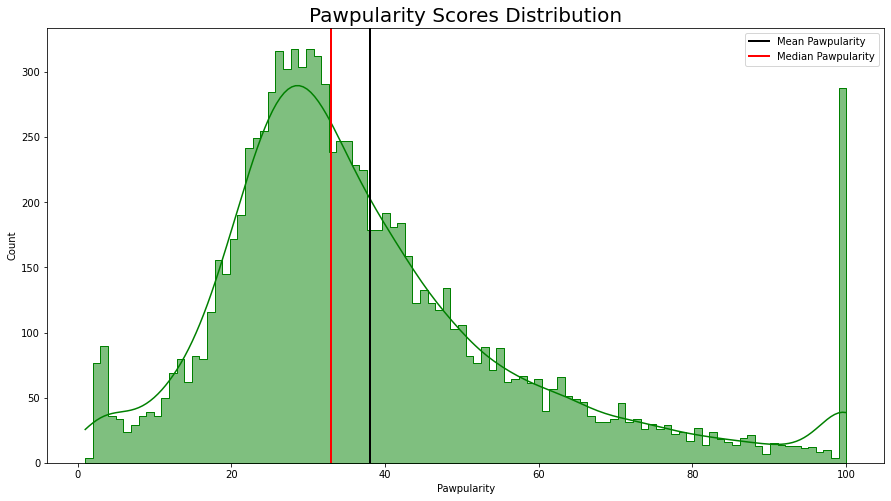

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))
sns.histplot(data=meta_data_train, x='Pawpularity', bins=max(meta_data_train['Pawpularity']),color='green',element="step",kde=True)
plt.axvline(meta_data_train['Pawpularity'].mean(), c='black', ls='-', lw=2, label='Mean Pawpularity')
plt.axvline(meta_data_train['Pawpularity'].median(),c='red',ls='-',lw=2, label='Median Pawpularity')
plt.title('Pawpularity Scores Distribution', fontsize=20)
plt.legend()
plt.show()

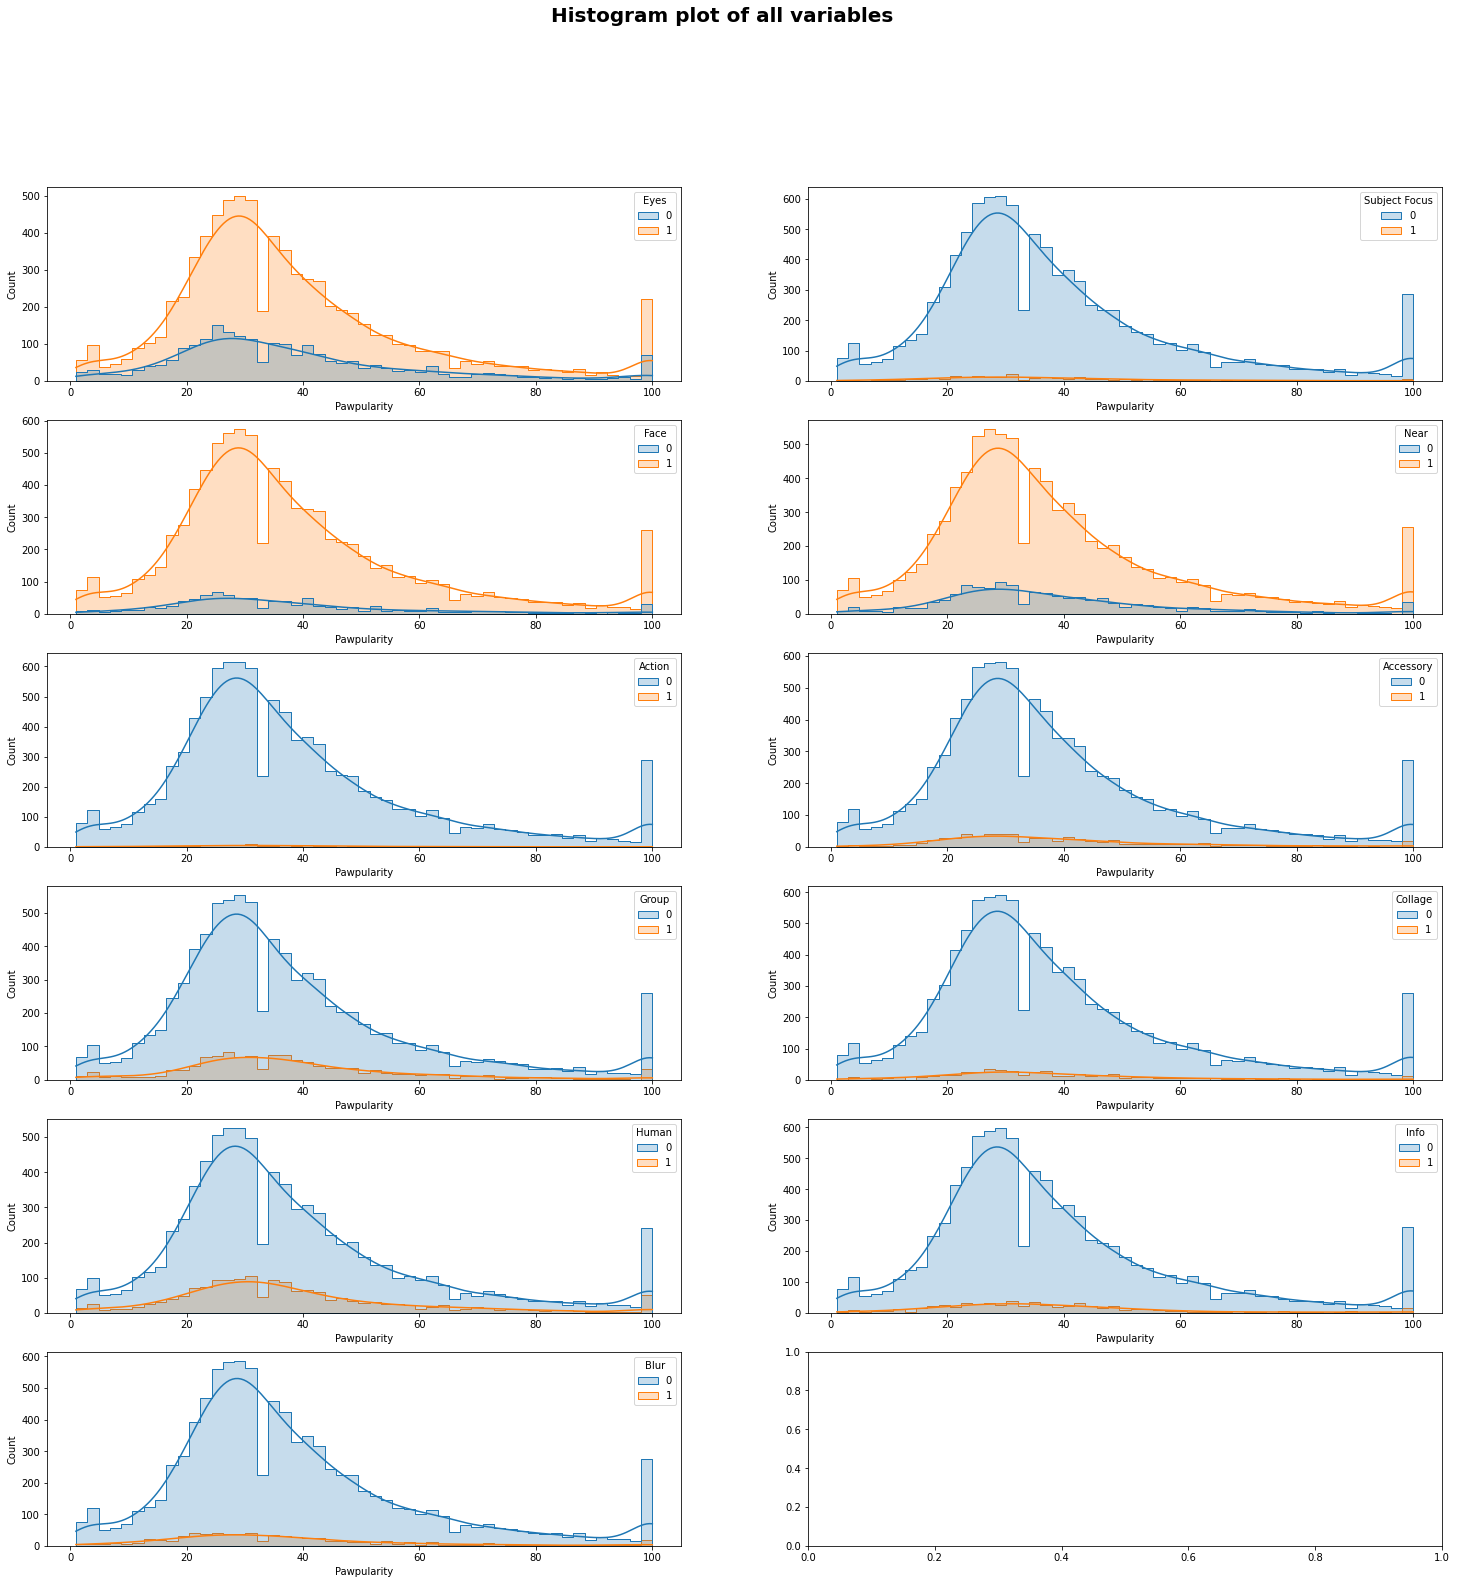

In [5]:
fig, ax = plt.subplots(6,2,figsize=(25,25))
sns.histplot(meta_data_train, x="Pawpularity", hue="Eyes",element ='step', kde=True, ax=ax[0][0])
sns.histplot(meta_data_train, x="Pawpularity", hue='Subject Focus',element ='step', kde=True,ax=ax[0][1])
sns.histplot(data=meta_data_train, hue='Face', x='Pawpularity',element ='step', kde=True, ax=ax[1][0])
sns.histplot(data=meta_data_train, hue='Near', x='Pawpularity',element ='step', kde=True, ax=ax[1][1])
sns.histplot(data=meta_data_train, hue='Action', x='Pawpularity',element ='step', kde=True, ax=ax[2][0])
sns.histplot(data=meta_data_train, hue='Accessory', x='Pawpularity',element ='step', kde=True, ax=ax[2][1])
sns.histplot(data=meta_data_train, hue='Group', x='Pawpularity',element ='step', kde=True, ax=ax[3][0])
sns.histplot(data=meta_data_train, hue='Collage', x='Pawpularity',element ='step', kde=True, ax=ax[3][1])
sns.histplot(data=meta_data_train, hue='Human', x='Pawpularity',element ='step', kde=True, ax=ax[4][0])
sns.histplot(data=meta_data_train, hue='Info', x='Pawpularity',element ='step', kde=True, ax=ax[4][1])
sns.histplot(data=meta_data_train, hue='Blur', x='Pawpularity',element ='step', kde=True, ax=ax[5][0])

plt.suptitle("Histogram plot of all variables", fontsize=20, fontweight='bold')
fig.show()

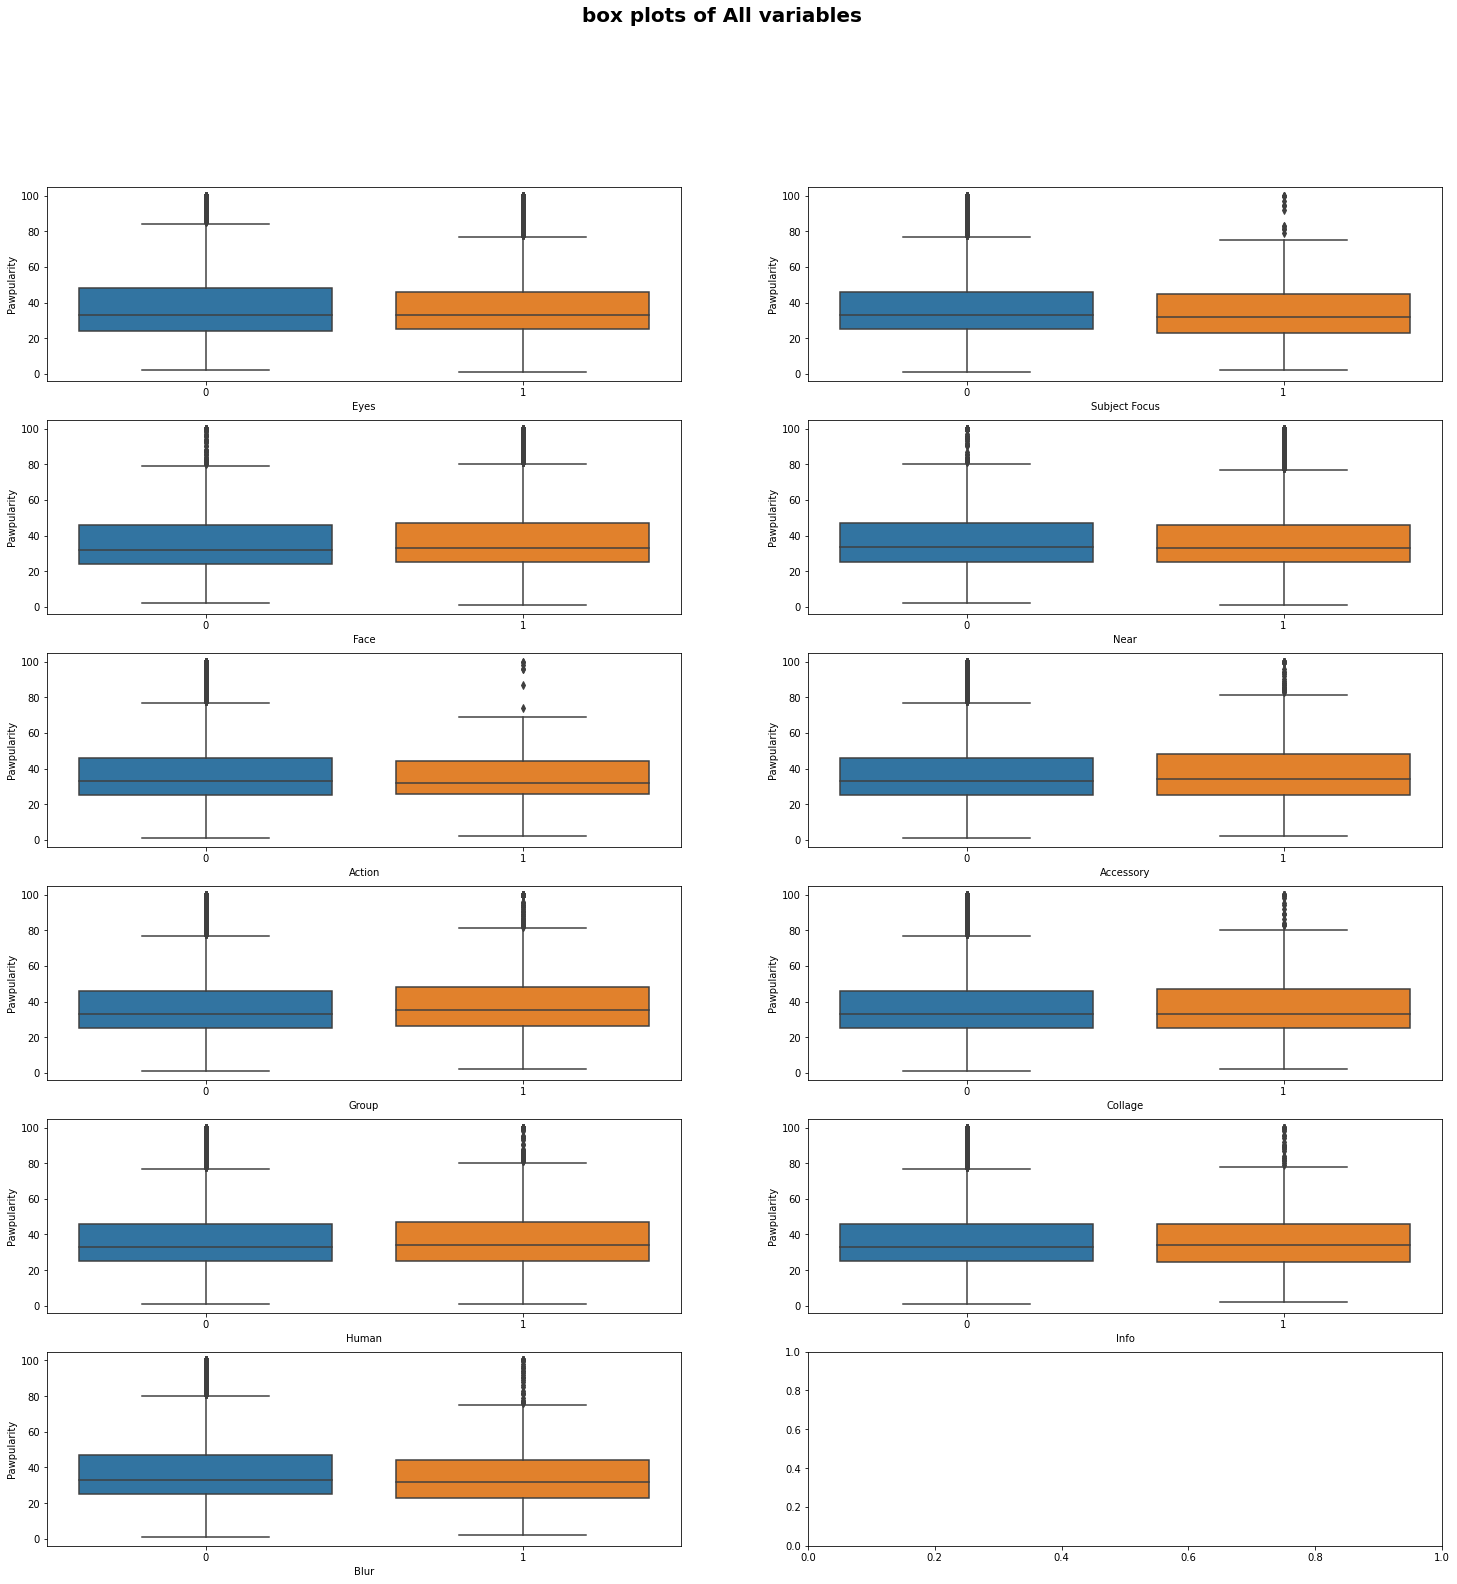

In [6]:

fig, ax = plt.subplots(6,2,figsize=(25,25))
sns.boxplot(data=meta_data_train, x='Eyes', y='Pawpularity', ax=ax[0][0])
sns.boxplot(data=meta_data_train, x='Subject Focus', y='Pawpularity', ax=ax[0][1])
sns.boxplot(data=meta_data_train, x='Face', y='Pawpularity', ax=ax[1][0])
sns.boxplot(data=meta_data_train, x='Near', y='Pawpularity', ax=ax[1][1])
sns.boxplot(data=meta_data_train, x='Action', y='Pawpularity', ax=ax[2][0])
sns.boxplot(data=meta_data_train, x='Accessory', y='Pawpularity', ax=ax[2][1])
sns.boxplot(data=meta_data_train, x='Group', y='Pawpularity', ax=ax[3][0])
sns.boxplot(data=meta_data_train, x='Collage', y='Pawpularity', ax=ax[3][1])
sns.boxplot(data=meta_data_train, x='Human', y='Pawpularity', ax=ax[4][0])
sns.boxplot(data=meta_data_train, x='Info', y='Pawpularity', ax=ax[4][1])
sns.boxplot(data=meta_data_train, x='Blur', y='Pawpularity', ax=ax[5][0])

plt.suptitle("box plots of All variables", fontsize=20, fontweight='bold')
fig.show()

In [7]:
from scipy.stats import kstest

gauss_dist = []

for x in [ 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory','Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']:
  stat, p = kstest(meta_data_train[x],'norm')
  if p >= 0.05:
    gauss_dist.append(x)

if len(gauss_dist) < 1 :
  print("the distributions of all the variables are not gaussian")

the distributions of all the variables are not gaussian


In [8]:
correlations = meta_data_train.corr()
def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

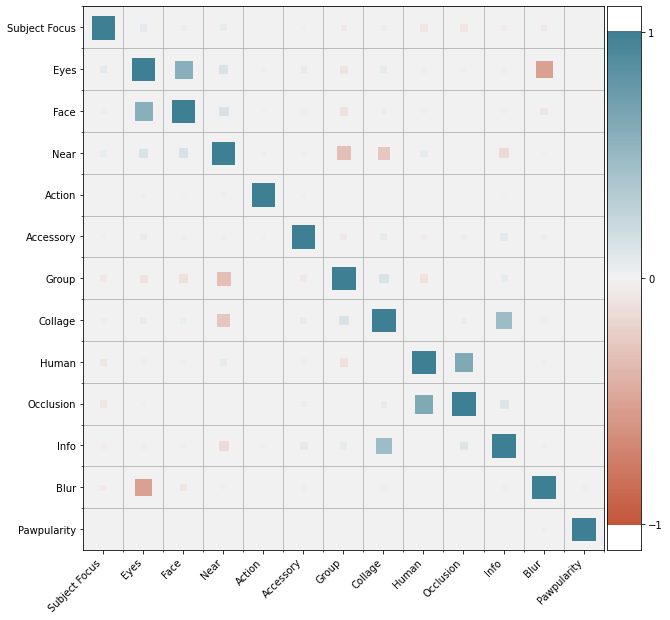

In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 

plt.figure(figsize=(10, 10))

corrplot(correlations)

In [10]:
import pandas as pd
import numpy as np

rmse_df = pd.DataFrame(columns = ['Model_name','rmse_train','rmse_test'])
rmse_score_dict = {'Model_name':[],'rmse_train':[],'rmse_test':[]}

In [11]:
# Visualization for actual and predicted values


def ActualvPredictionsGraph(y_test,y_pred,title):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.figure(figsize=(13,5))
    plt.scatter(range(len(y_test)), y_test, color='green')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.xlabel('Index ')
    plt.ylabel('Pawpularity ')
    plt.title(title,fontdict = {'fontsize' : 15})
    plt.legend(['Actual_test','predicted'],loc="upper right")
    plt.show()
    return

In [12]:
# for Actual vs predicted Distribution

def ActualvPredictionDistribution(y_test,y_pred):
    plt.figure(figsize=(12,4))
    sns.histplot(y_pred,color='r',alpha=0.3,stat='probability', kde=True)
    sns.histplot(y_test,color='g',alpha=0.3,stat='probability', kde=True)
    plt.legend(labels=['prediction','actual'])
    plt.title('Actual v Predict Distribution')
    plt.show()
    return


In [13]:
from sklearn.model_selection import train_test_split

x_columns = ['Subject Focus','Eyes','Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
x_train,x_test,y_train,y_test = train_test_split(meta_data_train[x_columns],meta_data_train['Pawpularity'],test_size=0.3,random_state=123)

In [14]:
# Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR_model = LinearRegression()
LR_model.fit(x_train,y_train)
pred_trn = LR_model.predict(x_train)
pred_tst = LR_model.predict(x_test)

rmse_trn = mean_squared_error(y_train,np.round(pred_trn),squared = False)
rmse_tst = mean_squared_error(y_test,np.round(pred_tst),squared = False)

rmse_score_dict['Model_name'].append('LinearRegression') 
rmse_score_dict['rmse_train'].append(rmse_trn)
rmse_score_dict['rmse_test'].append(rmse_tst)

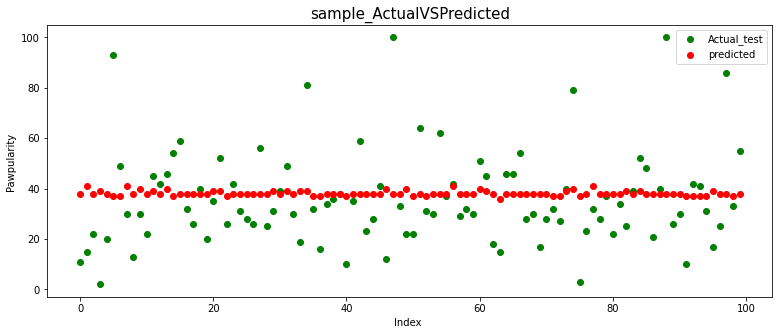

In [15]:
ActualvPredictionsGraph(y_test[:100],np.round(pred_tst[:100]),"sample_ActualVSPredicted")

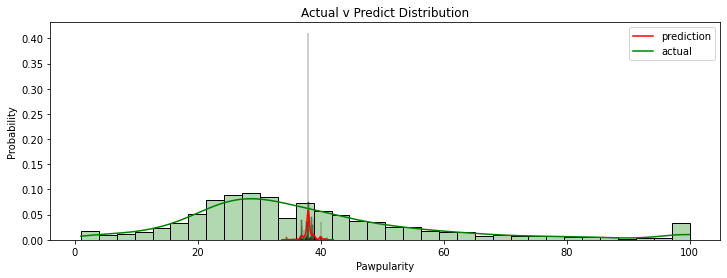

In [16]:
import seaborn as sns

ActualvPredictionDistribution(y_test,pred_tst)

In [17]:
# Decision Tree Regressor


from sklearn.tree import DecisionTreeRegressor

DST_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=100) 

DST_model.fit(x_train,y_train)

pred_trn = DST_model.predict(x_train)
pred_tst = DST_model.predict(x_test)

rmse_trn = mean_squared_error(y_train,np.round(pred_trn),squared = False)
rmse_tst = mean_squared_error(y_test,np.round(pred_tst),squared = False)

rmse_score_dict['Model_name'].append('DecisionTreeRegressor') 
rmse_score_dict['rmse_train'].append(rmse_trn)
rmse_score_dict['rmse_test'].append(rmse_tst)

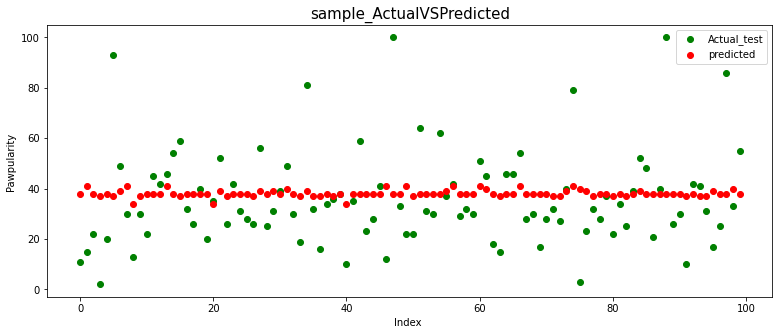

In [18]:
ActualvPredictionsGraph(y_test[:100],np.round(pred_tst[:100]),"sample_ActualVSPredicted")

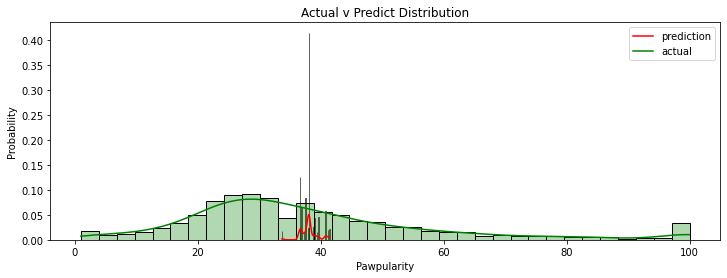

In [19]:
ActualvPredictionDistribution(y_test,pred_tst)

In [20]:
# Ridge Regressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


parameters = {'alpha':[1,2,3,5,7,9,10]}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters,cv=7)

#fit the grid search
Ridge_reg.fit(x_train,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(x_train,y_train)

pred_trn = best_model.predict(x_train)
pred_tst = best_model.predict(x_test)

rmse_trn = mean_squared_error(y_train,np.round(pred_trn),squared = False)
rmse_tst = mean_squared_error(y_test,np.round(pred_tst),squared = False)

rmse_score_dict['Model_name'].append('Ridge') 
rmse_score_dict['rmse_train'].append(rmse_trn)
rmse_score_dict['rmse_test'].append(rmse_tst)

Ridge(alpha=10)


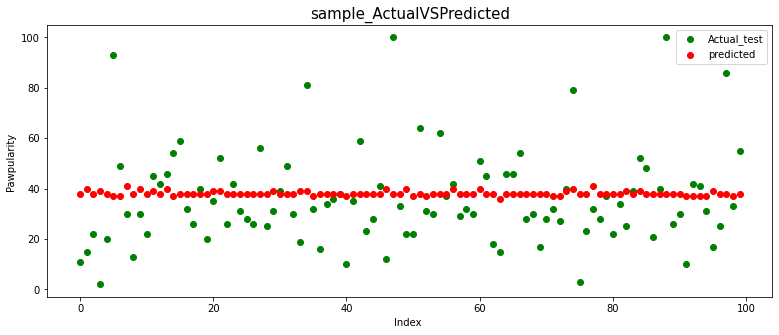

In [21]:
ActualvPredictionsGraph(y_test[:100],np.round(pred_tst[:100]),"sample_ActualVSPredicted")

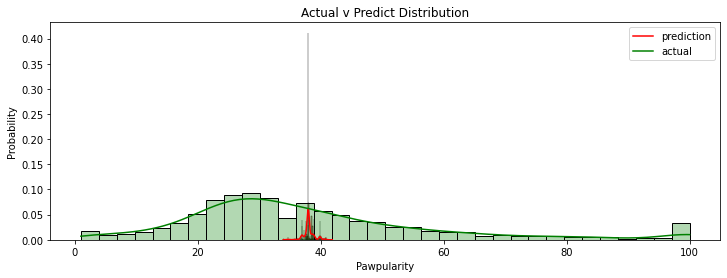

In [22]:
ActualvPredictionDistribution(y_test,pred_tst)

In [23]:
# Random forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4,10],
}

RF_model = RandomForestRegressor(random_state=100)

search_rgrs = GridSearchCV(RF_model, parameters,cv=7)
search_rgrs.fit(x_train, y_train)

rgrs = search_rgrs.best_estimator_


pred_trn = rgrs.predict(x_train)
pred_tst = rgrs.predict(x_test)

#rmse_trn = mean_squared_error(y_train,np.round(pred_trn),squared = False)
#rmse_tst = mean_squared_error(y_test,np.round(pred_tst),squared = False)

#rmse_score_dict['Model_name'].append('RandomForestRegressor') 
#rmse_score_dict['rmse_train'].append(rmse_trn)
#rmse_score_dict['rmse_test'].append(rmse_tst)

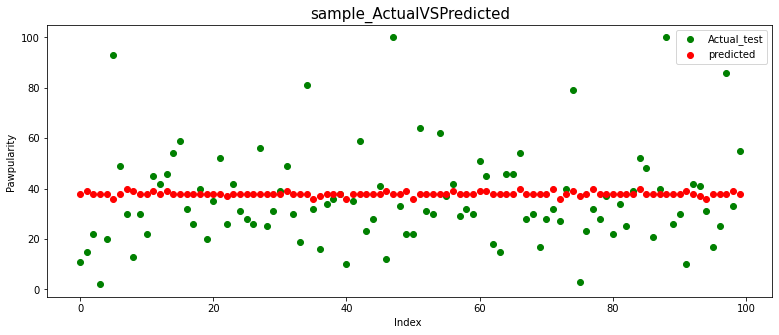

In [24]:
ActualvPredictionsGraph(y_test[:100],np.round(pred_tst[:100]),"sample_ActualVSPredicted")

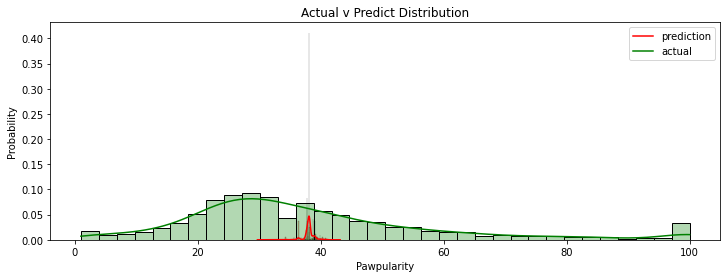

In [25]:
ActualvPredictionDistribution(y_test,pred_tst)

In [26]:
# Lasso Regressor

from sklearn.linear_model import Lasso

lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

lasso_model = Lasso(random_state = 123)

search_rgrs = GridSearchCV(lasso_model, lasso_params,cv=7)
search_rgrs.fit(x_train, y_train)

Lasso_rgrs = search_rgrs.best_estimator_

pred_trn = Lasso_rgrs.predict(x_train)
pred_tst = Lasso_rgrs.predict(x_test)

rmse_trn = mean_squared_error(y_train,np.round(pred_trn),squared = False)
rmse_tst = mean_squared_error(y_test,np.round(pred_tst),squared = False)

rmse_score_dict['Model_name'].append('Lasso') 
rmse_score_dict['rmse_train'].append(rmse_trn)
rmse_score_dict['rmse_test'].append(rmse_tst)

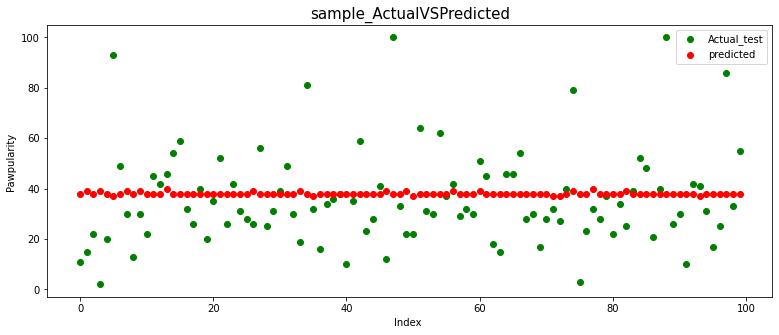

In [27]:
ActualvPredictionsGraph(y_test[:100],np.round(pred_tst[:100]),"sample_ActualVSPredicted")

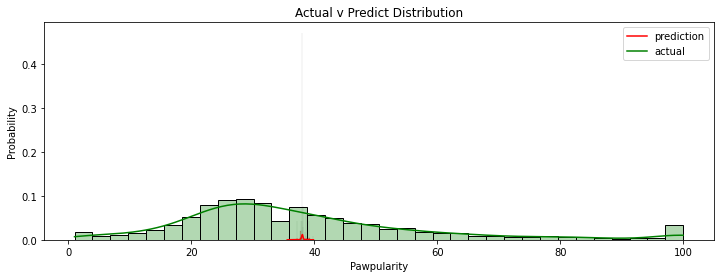

In [28]:
ActualvPredictionDistribution(y_test,pred_tst)

In [29]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'linear')
regressor.fit(x_train, y_train)

pred_trn = regressor.predict(x_train)
pred_tst = regressor.predict(x_test)

rmse_trn = mean_squared_error(y_train,np.round(pred_trn),squared = False)
rmse_tst = mean_squared_error(y_test,np.round(pred_tst),squared = False)

rmse_score_dict['Model_name'].append('SVM_linear') 
rmse_score_dict['rmse_train'].append(rmse_trn)
rmse_score_dict['rmse_test'].append(rmse_tst)

In [30]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

pred_trn = regressor.predict(x_train)
pred_tst = regressor.predict(x_test)

rmse_trn = mean_squared_error(y_train,np.round(pred_trn),squared = False)
rmse_tst = mean_squared_error(y_test,np.round(pred_tst),squared = False)

rmse_score_dict['Model_name'].append('SVM_rbf') 
rmse_score_dict['rmse_train'].append(rmse_trn)
rmse_score_dict['rmse_test'].append(rmse_tst)

In [31]:
rmse_df = pd.DataFrame(rmse_score_dict)

In [32]:
rmse_df

,Model_name,rmse_train,rmse_test
0,LinearRegression,20.581756,20.541861
1,DecisionTreeRegressor,20.556712,20.540437
2,Ridge,20.586857,20.552073
3,Lasso,20.589272,20.552686
4,SVM_linear,21.151409,21.063279
5,SVM_rbf,21.105266,21.078998


Though there is no much difference in scores the best model from the scores observed is "Random Forest Regressor"

In [33]:
#Now submit to the competition using the model:

test_df = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')
x_test_submission = test_df.drop(['Id'],axis=1) 
test_df['Pawpularity'] = rgrs.predict(x_test_submission) 
submission_df = test_df[['Id','Pawpularity']]
submission_df.to_csv("submission.csv", index=False)
submission_df.head()

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,37.201297
1,43a2262d7738e3d420d453815151079e,38.157330
2,4e429cead1848a298432a0acad014c9d,40.750376
3,80bc3ccafcc51b66303c2c263aa38486,35.244585
4,8f49844c382931444e68dffbe20228f4,28.915300
